In [1]:
import pandas as pd

stocks=pd.read_csv('/kaggle/input/d/hsharmagla/stocks/stocks.csv',header='infer')
stocks.index=stocks['date']
stocks=stocks.drop(['date'],axis=1)
stocks.head()

,company,price
date,,
Jan 2000,MSFT,39.81
Feb 2000,MSFT,36.35
Mar 2000,MSFT,43.22
Apr 2000,MSFT,28.37
May 2000,MSFT,25.45


In [2]:
stocks = stocks.pivot_table(values='price', index=stocks.index, columns='company', aggfunc='first')
stocks

company,AAPL,AMZN,IBM,MSFT
date,,,,
Apr 2000,31.01,55.19,99.95,28.37
Apr 2001,12.74,15.78,103.70,27.56
Apr 2002,12.14,16.69,75.82,21.26
Apr 2003,7.11,28.69,77.47,20.87
Apr 2004,12.89,43.60,81.04,21.45
...,...,...,...,...
Sep 2005,53.61,45.30,74.70,23.83
Sep 2006,76.98,32.12,77.26,25.68
Sep 2007,153.47,93.15,112.60,28.04


In [3]:
import numpy as np

N,d =stocks.shape
delta=pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values,stocks.iloc[:N-1,:].values),columns=stocks.columns,index=stocks.iloc[1:].index)
delta.head()

company,AAPL,AMZN,IBM,MSFT
date,,,,
Apr 2001,-58.916479,-71.407864,3.751876,-2.855129
Apr 2002,-4.709576,5.766793,-26.885246,-22.859216
Apr 2003,-41.433278,71.899341,2.176207,-1.834431
Apr 2004,81.293952,51.969327,4.608235,2.779109
Apr 2005,179.751746,-25.779817,-12.672754,8.531469


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  """


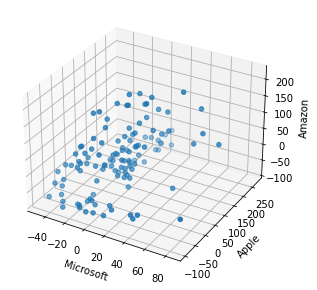

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(8,5)).gca(projection='3d')
fig.scatter(delta.MSFT,delta.AAPL,delta.AMZN)
fig.set_xlabel('Microsoft')
fig.set_ylabel('Apple')
fig.set_zlabel('Amazon')
plt.show()

In [5]:
meanValue=delta.mean()
covValue=delta.cov()
print(meanValue)
print(covValue)

company
AAPL    34.793255
AMZN    25.198555
IBM      2.352484
MSFT     2.631394
dtype: float64
company         AAPL         AMZN         IBM        MSFT
company                                                  
AAPL     6552.971916  2056.025402  773.945773  766.484202
AMZN     2056.025402  5929.196407  838.216414  582.549809
IBM       773.945773   838.216414  462.727295  327.586987
MSFT      766.484202   582.549809  327.586987  576.333887


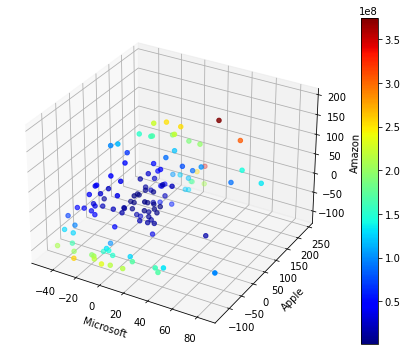

In [6]:
from numpy.linalg import inv

X=delta.values
S=covValue.values
for i in range(3):
    X[:,i]=X[:,i]-meanValue[i]

def mahalanobis(row):
    return np.matmul(row,S).dot(row)
    
anomaly_score=np.apply_along_axis(mahalanobis,axis=1,arr=X)

fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111,projection='3d')
p=ax.scatter(delta.MSFT,delta.AAPL,delta.AMZN,c=anomaly_score,cmap='jet')
ax.set_xlabel('Microsoft')
ax.set_ylabel('Apple')
ax.set_zlabel('Amazon')
fig.colorbar(p)
plt.show()

In [7]:
anom=pd.DataFrame(anomaly_score,index=delta.index,columns=['Anomaly score'])
result=pd.concat=pd.concat((delta,anom),axis=1)
result.nlargest(2,'Anomaly score')

,AAPL,AMZN,IBM,MSFT,Anomaly score
date,,,,,
Nov 2009,80.929201,193.091843,55.575953,48.880977,3.748433e+08
Feb 2005,240.290357,-43.403623,-5.644479,6.338999,3.469886e+08


Text(0, 0.5, 'Percent Change')

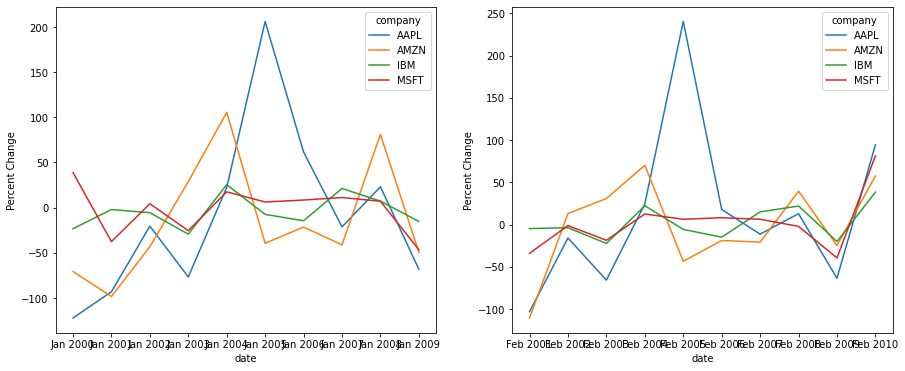

In [8]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ts=delta[40:50]
ts.plot.line(ax=ax1)
ax1.set_xticks(range(10))
ax1.set_xticklabels(ts.index)
ax1.set_ylabel('Percent Change')

ts=delta[30:40]
ts.plot.line(ax=ax2)
ax2.set_xticks(range(10))
ax2.set_xticklabels(ts.index)
ax2.set_ylabel('Percent Change')